In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from IPython.display import Latex
sns.set()

In [41]:
!ls

ch2.ipynb  ch4.ipynb	  prostate.txt	vowel_test.txt
ch3.ipynb  prostate.data  SAheart.txt	vowel_train.txt


In [42]:
df1 = pd.read_table("./vowel_train.txt",sep=',',index_col=0)
df2 = pd.read_table("./vowel_test.txt",sep=',',index_col=0)

print(df1.shape)
print(len(np.unique(df1.iloc[:,0])))
df1.head

(528, 11)
11


<bound method NDFrame.head of             y    x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9  \
row.names                                                                      
1           1 -3.639  0.418 -0.670  1.779 -0.168  1.627 -0.388  0.529 -0.874   
2           2 -3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.510 -0.621   
3           3 -2.120  0.894 -1.576  0.147 -0.707  1.559 -0.579  0.676 -0.809   
4           4 -2.287  1.809 -1.498  1.012 -1.053  1.060 -0.567  0.235 -0.091   
5           5 -2.598  1.938 -0.846  1.062 -1.633  0.764  0.394 -0.150  0.277   
...        ..    ...    ...    ...    ...    ...    ...    ...    ...    ...   
524         7 -4.065  2.876 -0.856 -0.221 -0.533  0.232  0.855  0.633 -1.452   
525         8 -4.513  4.265 -1.477 -1.090  0.215  0.829  0.342  0.693 -0.601   
526         9 -4.651  4.246 -0.823 -0.831  0.666  0.546 -0.300  0.094 -1.343   
527        10 -5.034  4.993 -1.633 -0.285  0.398  0.181 -0.211 -0.508 -0.283   
528       

In [43]:
def data_get(df):
    [N,p]=df.shape
    K =len(np.unique(df.iloc[:,0]))
    y =np.zeros((N,K),dtype=int)
    X =np.zeros((N,p-1))
    
    for i in range(N):
        y[i,df.iloc[i,0]-1]=1
    X =df.iloc[:,1:].values
    
    return [y,X]
    
    

In [44]:
[y_train_origin,X_train_origin] =data_get(df1)
[y_test_origin,X_test_origin] =data_get(df2)
X_train =X_train_origin.copy()
X_test  =X_test_origin.copy()
y_train =y_train_origin.copy()
y_test  =y_test_origin.copy()

def standardization(X):
    Xs =X.copy()
    X_means =Xs.mean(axis=0)
    X_corrs =np.cov(Xs.T)
    X_vars =np.sqrt(X_corrs.diagonal())
    Xs =Xs -X_means[np.newaxis,:]
    Xs =Xs/(X_vars[np.newaxis,:])
    return Xs


    

    

In [45]:
print('y_train.shape ',y_train.shape)
print('y_train[0:10] ',y_train[0:10,:])
print('X_train.shape ',X_train.shape)
print('X_train[0:10]',X_train[0:10,:])

N_train =X_train.shape[0]
total =np.concatenate([X_train,X_test],axis=0)
total =standardization(total)

X_train =total[:N_train,:]
X_test  =total[N_train:,:]

print('X_train.shape ',X_train.shape)


y_train.shape  (528, 11)
y_train[0:10]  [[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]]
X_train.shape  (528, 10)
X_train[0:10] [[-3.639  0.418 -0.67   1.779 -0.168  1.627 -0.388  0.529 -0.874 -0.814]
 [-3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.51  -0.621 -0.488]
 [-2.12   0.894 -1.576  0.147 -0.707  1.559 -0.579  0.676 -0.809 -0.049]
 [-2.287  1.809 -1.498  1.012 -1.053  1.06  -0.567  0.235 -0.091 -0.795]
 [-2.598  1.938 -0.846  1.062 -1.633  0.764  0.394 -0.15   0.277 -0.396]
 [-2.852  1.914 -0.755  0.825 -1.588  0.855  0.217 -0.246  0.238 -0.365]
 [-3.482  2.524 -0.433  1.048 -1.995  0.902  0.322  0.45   0.377 -0.366]
 [-3.941  2.305  0.124  1.771 -1.815  0.593 -0.435  0.992  0.575 -0.301]
 [-3.86   2.116 -0.939  0.688 -0.675  1.679 -0.512  0.928 -0.167 -0.434]
 [-3.648  1.8

In [46]:


class  LinearRegression:
    
    def __init__(self,intercepts=None,betas=None,p=None,K=None):
        self.intercepts =intercepts
        self.betas =betas
        self.p =p
        self.K =K
        
    def fit(self,X,y):
        Xs =X.copy()
        ys =y.copy()
        [N,p] =Xs.shape
        K =ys.shape[1]
        self.p =p
        self.K =K
        
        intercepts =ys.mean(axis=0)
        ys =ys -intercepts[np.newaxis,:]
        betas =np.linalg.pinv(Xs).dot(ys)
        
        self.intercepts =intercepts
        self.betas =betas
    
    def predict(self,X):
        Xs =X.copy()
        [N,p] =Xs.shape
        K =self.K
        
        y_predict =np.zeros((N,),dtype=int)
        
        y_predict =np.argmax((self.intercepts[np.newaxis,:]+Xs.dot(self.betas)),axis=1)
        
        return y_predict
    



In [47]:
lr =LinearRegression()
lr.fit(X_train,y_train)

y_predict =lr.predict(X_train)
err =np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
print('train err : ',err)

y_predict =lr.predict(X_test)
err =np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
print('test err : ',err)
#效果比较差，是我编程错了，还是因为多类别数据的Mask原因 np.argmax(axis=1) //axis参数写错了，搞笑

train err :  0.4678030303030303
test err :  0.658008658008658


In [48]:
class LDA:
    def __init__(self,priors=None,means=None,cov=None,p=None,K=None):
        
        self.priors =priors
        self.means =means
        self.cov =cov
        self.p= p
        self.K =K
        
    
    def fit(self,X,y):
        Xs =X.copy()
        ys =y.copy()
        
        [N,p]=Xs.shape
        K =ys.shape[1]
        self.p=p
        self.K =K
        ys =np.argmax(ys,axis=1)
        priors =np.zeros((K,),dtype=float)
        means  =np.zeros((K,p),dtype=float)
        cov   =np.zeros((p,p),dtype=float)
        
        for k in range(K):
            #print('ys==k ',ys[(ys==k)])
            xx =Xs[ys==k,:]
            priors[k] =(1.0*xx.shape[0])/N
            means[k] =xx.mean(axis=0)
            cov = cov +(xx-means[k][np.newaxis,:]).T.dot(xx-means[k][np.newaxis,:])
        cov =cov/(N-K)
        
        
        self.cov =cov
        self.priors =priors
        self.means =means
        
        
    
    def predict(self,X):
        Xs =X.copy()
        [N,p] =X.shape
        K =self.K
        y_predict =np.zeros((N,),dtype=float)
        
        cov   =self.cov
        means =self.means
        [D,U] = np.linalg.eig(cov)
        
        
        Xs =(np.diag(1./np.sqrt(D)).dot(U.T).dot(Xs.T)).T
        means =(np.diag(1./np.sqrt(D)).dot(U.T).dot(means.T)).T
        
        scores =np.sum(-0.5*np.square(Xs[:,np.newaxis,:]-means[np.newaxis,:,:]),axis=2)+self.priors[np.newaxis,:]
        y_predict =np.argmax(scores,axis=1)
        
        return y_predict
        

    

In [49]:
lda =LDA()
lda.fit(X_train,y_train)
y_predict =lda.predict(X_train)

err =np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
print('train err: ',err)

y_predict =lda.predict(X_test)

err =np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
print('test err: ',err)

train err:  0.3162878787878788
test err:  0.5562770562770563


In [50]:
class QDA:
    
    def __init__(self,priors=None,means=None,cov_invs=None,p=None,K=None):
        self.priors =priors
        self.means =means
        self.cov_invs =cov_invs
        self.p =p
        self.K =K
    
    def fit(self,X,y):
        Xs =X.copy()
        ys =y.copy()
        [N,p] =X.shape
        K =y.shape[1]
        self.p =p
        self.K =K
        
        ys =np.argmax(ys,axis=1)
        priors =np.zeros((K,),dtype=float)
        means  =np.zeros((K,p),dtype=float)
        cov_invs =np.zeros((K,p,p),dtype=float)
        
        for k in range(K):
            xx =Xs[ys==k,:]
            n =xx.shape[0]
            priors[k] =(1.0*n)/N
            means[k] =np.mean(xx,axis=0)
            tt =xx -means[k][np.newaxis,:]
            cov_invs[k] =np.linalg.inv(tt.T.dot(tt)/(n-1))
        
        self.priors =priors
        self.means =means
        self.cov_invs =cov_invs
        
    
    def predict(self,X):
        [N,p] =X.shape
        #print('N=',N," ",'p=',p)
        K =self.K
        Xs =X.copy()
        
        fun2 =lambda x,prior,mean,cov_inv :0.5*np.log(np.linalg.det(cov_inv))-0.5*(x-mean).T.dot(cov_inv.dot(x-mean))+np.log(prior)
        
        y_predict =np.zeros((N,),dtype=int)
        
        for i in range(N):
            index =-1
            val =-999.0
            for k in range(K):
                tt =fun2(Xs[i,:][:,np.newaxis],self.priors[k],self.means[k][:,np.newaxis],self.cov_invs[k])
                if(tt>val):
                    val=tt
                    index =k
            
            y_predict[i]=index
        
        #print('y_predict.shape  inside ',y_predict.shape)
        #print('y_predict[-1] ',y_precit[333])
        return y_predict
            


In [51]:
qda =QDA()
qda.fit(X_train,y_train)
y_predict =qda.predict(X_train)
#print('X_train.shape ',X_train.shape)
#print('y_train.shape ',y_train.shape)
#print('y_predict.shape ',y_predict.shape)
err =np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
print('train err: ',err)

y_predict =qda.predict(X_test)
#print('X_test.shape ',X_test.shape)
#print('y_test.shape ',y_test.shape)
#print('y_predict.shape ',y_predict.shape)
err =np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
print('test err: ',err)

train err:  0.011363636363636364
test err:  0.5281385281385281


In [52]:
class RDA:
    
    def __init__(self,priors=None,means=None,covs=None,cov=None,p=None,K=None,alpha=None):
        self.priors =priors
        self.means =means
        self.covs =covs
        self.cov =cov
        self.p=p
        self.K=K
        self.alpha =None
    
    def fit(self,X,y):
        Xs =X.copy()
        ys =y.copy()
        [N,p]=Xs.shape
        K =ys.shape[1]
        
        self.p =p
        self.K =K
        
        priors =np.zeros((K,),dtype=float)
        means  =np.zeros((K,p),dtype=float)
        covs   =np.zeros((K,p,p),dtype=float)
        cov    =np.zeros((p,p),dtype=float)
        
        ys =np.argmax(ys,axis=1)
        for k in range(K):
            xx =Xs[ys==k,:]
            n =xx.shape[0]
            
            priors[k] =(1.0*n)/N
            means[k]  =np.mean(xx,axis=0)
            
            covs[k] =np.cov(xx.T)
            cov =cov +(n-1)*covs[k]
            
        cov =cov/(N-K)
        
        self.priors =priors
        self.means  =means
        self.covs   =covs
        self.cov    =cov
        
    def predict(self,X,alpha=0.9):
        Xs =X.copy()
        self.alpha =alpha
        
        [N,p] =Xs.shape
        K =self.K
        
        
        covs =self.covs
        cov =self.cov
        #print('covs ',covs)
        #print('cov.shape ',cov.shape,' ','cov,dtype ',cov.dtype)
        y_predict =np.zeros((N,),dtype=int)
        
        covs = alpha*covs +(1-alpha)*cov[np.newaxis,:,:]
        
        fun2 =lambda x,prior,mean,cov_inv :0.5*np.log(np.linalg.det(cov_inv))-0.5*(x-mean).T.dot(cov_inv.dot(x-mean))+np.log(prior)
       
        
        for i in range(N):
            index =-1
            val =-999.0
            for k in range(K):
                cov_inv =np.linalg.inv(covs[k])
                tt =fun2(Xs[i,:][:,np.newaxis],self.priors[k],self.means[k][:,np.newaxis],cov_inv)
                if(tt>val):
                    val=tt
                    index =k
            
            y_predict[i]=index
        
        #print('y_predict.shape  inside ',y_predict.shape)
        #print('y_predict[-1] ',y_precit[333])
        return y_predict
            

        
        
        
    
    
        
    
            

In [53]:
rda =RDA()
rda.fit(X_train,y_train)
y_predict =rda.predict(X_train)
err =np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
print('train err: ',err)

y_predict =rda.predict(X_test)
err =np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
print('test err: ',err)

train err:  0.020833333333333332
test err:  0.4523809523809524


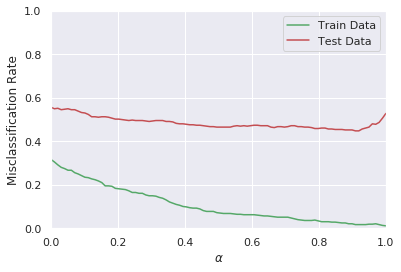

In [54]:
alphas =np.linspace(0,1,100)

train_errs =np.zeros((100,),dtype=float)
test_errs  =np.zeros((100,),dtype=float)

for i in range(alphas.shape[0]):
    alpha =alphas[i]
    y_predict =rda.predict(X_train,alpha=alpha)
    train_errs[i]=np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
    y_predict =rda.predict(X_test,alpha=alpha)
    test_errs[i]=np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
    
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel(r"$\alpha$")
plt.ylabel('Misclassification Rate')

plt.plot(alphas,train_errs,'-g',label='Train Data')
plt.plot(alphas,test_errs,'-r',label='Test Data')
plt.legend()


In [55]:
class ReducedRankLinearDiscriminant:
    
    def __init__(self,B=None,W=None,priors=None,means=None,eigvals=None,eigvecs=None,p=None,K=None):
        self.B =B
        self.W =W
        self.priors =priors
        self.means =means 
        self.eigvals =eigvals
        self.eigvecs =eigvecs
        self.p =p
        self.K =K
    
    def fit(self,X,y):
        Xs =X.copy()
        ys =y.copy()
        [N,p] =Xs.shape
        K =ys.shape[1]
        self.p =p
        self.K =K
        
        ys =np.argmax(ys,axis=1)
        W =np.zeros((p,p),dtype=float)
        B =np.zeros((p,p),dtype=float)
        means  =np.zeros((K,p),dtype=float)
        priors =np.zeros((K,),dtype=float)
        
        for k in range(K):
            xx =Xs[ys==k,:]
            n =xx.shape[0]
            priors[k] =(1.0*n)/N
            means[k] =np.mean(xx,axis=0)
            W =W +(n-1)*np.cov(xx.T)
        
        W =W/(N-K)
        B =np.cov(means.T)
        [D,U] =np.linalg.eig(W)
        
       
        
        
        [eigvals,eigvecs] =np.linalg.eig(U.dot(np.diag(1./D)).dot(U.T).dot(B))
        
        self.means =means
        self.eigvals =eigvals
        self.eigvecs =eigvecs
        self.B =B
        self.W =W
        self.priors =priors
    
    def predict(self,X,cords=False,choices=None):
        Xs =X.copy()
        p =self.p
        K =self.K
        
        priors =self.priors
        choices =np.array(choices,dtype=int)
        if(np.all(choices)==None):
            tt =self.eigvecs
        elif(len(choices)==1):
            
            tt =self.eigvecs[:,choices[0]-1][:,np.newaxis]
        else:
            choices =np.array(choices,dtype=int)
            tt =self.eigvecs[:,choices-1]
            
        
        Xs =Xs.dot(tt)
        #print('Xs[0] ',Xs[0])
        #print('Xs[-1] ',Xs[-1])
        means =self.means.dot(tt)
        cov =tt.T.dot(self.W).dot(tt)
        
        lda =LDA(priors=priors,means=means,cov=cov,p=p,K=K)
        y_predict =lda.predict(Xs)
        
        if(cords==True):
            return [y_predict,Xs]
        else:
            return [y_predict]
    
            
        
        
            
            

        

In [56]:
rrld =ReducedRankLinearDiscriminant()
rrld.fit(X_train,y_train)
[y_predict,Xc ] =rrld.predict(X_train,cords=True,choices=[1,2])
err =np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
print('train err: ',err)
[y_predict,Xc ] =rrld.predict(X_test,cords=True,choices=[1,2])
err =np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
print('train err: ',err)

print(np.array(np.array(np.zeros(3,),dtype=float),dtype=float))

train err:  0.3503787878787879
train err:  0.49134199134199136
[0. 0. 0.]


In [57]:
r =np.count_nonzero(rrld.eigvals)

ndims =np.array(range(1,r+1),dtype=int)

train_errs =np.zeros((r,),dtype=float)
test_errs  =np.zeros((r,),dtype=float)

for i in range(r):
    orders =ndims[:i+1]
    print('orders ',orders)
    y_predict=rrld.predict(X_train,cords=False,choices=orders)
    train_errs[i] =np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
    print('train_errs[i] ',train_errs[i])
    y_predict=rrld.predict(X_test,cords=False,choices=orders)
    test_errs[i] =np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
    print('test_errs[i] ',test_errs[i])


orders  [1]
train_errs[i]  0.6117424242424242
test_errs[i]  0.6991341991341992
orders  [1 2]
train_errs[i]  0.3503787878787879
test_errs[i]  0.49134199134199136
orders  [1 2 3]
train_errs[i]  0.32954545454545453
test_errs[i]  0.49567099567099565
orders  [1 2 3 4]
train_errs[i]  0.32954545454545453
test_errs[i]  0.5108225108225108
orders  [1 2 3 4 5]
train_errs[i]  0.3162878787878788
test_errs[i]  0.5151515151515151
orders  [1 2 3 4 5 6]
train_errs[i]  0.30113636363636365
test_errs[i]  0.5541125541125541
orders  [1 2 3 4 5 6 7]
train_errs[i]  0.3125
test_errs[i]  0.5541125541125541
orders  [1 2 3 4 5 6 7 8]
train_errs[i]  0.3181818181818182
test_errs[i]  0.5562770562770563
orders  [1 2 3 4 5 6 7 8 9]
train_errs[i]  0.3143939393939394
test_errs[i]  0.551948051948052
orders  [ 1  2  3  4  5  6  7  8  9 10]
train_errs[i]  0.3162878787878788
test_errs[i]  0.5562770562770563


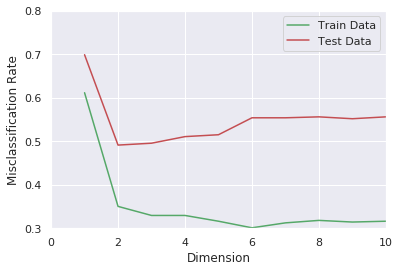

In [58]:
plt.xlim(0,ndims[-1])
plt.ylim(0.3,0.8)

plt.xlabel("Dimension")
plt.ylabel('Misclassification Rate')

plt.plot(ndims,train_errs,'-g',label='Train Data')
plt.plot(ndims,test_errs,'-r',label='Test Data')
plt.legend()

In [59]:
[y_predict,Xc ] =rrld.predict(X_train,cords=True,choices=[1,2])
print('Xc.shape ',Xc.shape)

print('Xc limits ',np.min(Xc,axis=0),np.max(Xc,axis=0))

Xc.shape  (528, 2)
Xc limits  [-2.29874878 -1.89540269] [2.38148435 3.2020954 ]


X.shape  (1000, 1000)
Y.shape  (1000, 1000)
points  (1000000, 10)


Text(0, 0.5, 'Canonical Coordinate 2')

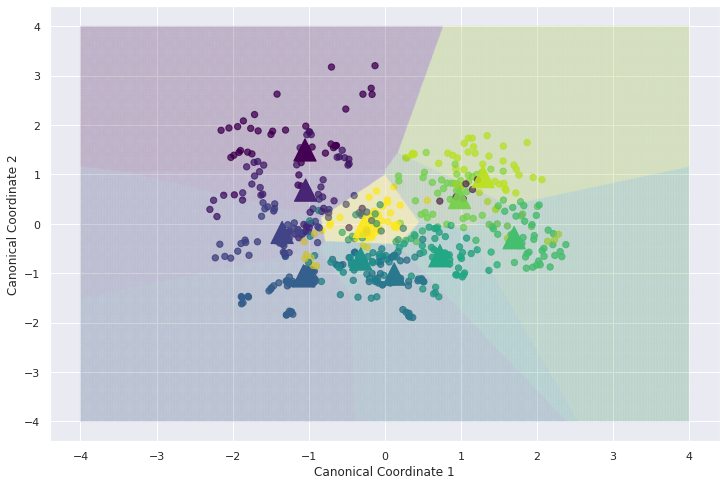

In [60]:
x =np.linspace(-4,4,1000)
y =np.linspace(-4,4,1000)
X,Y =np.meshgrid(x,y)
print('X.shape ',X.shape)
print('Y.shape ',Y.shape)
points =np.array(list(zip(X.reshape(-1,1),Y.reshape(-1,1))),dtype=float)
points =points.reshape((points.shape[0],points.shape[1]))

points =points.dot(np.linalg.inv(rrld.eigvecs[:,:2].T.dot(rrld.eigvecs[:,:2]))).dot(rrld.eigvecs[:,:2].T)
print('points ',points.shape)


plt.subplots(figsize=(12,8))
plt.scatter(Xc[:,0],Xc[:,1],alpha=0.7,c=np.argmax(y_train,axis=1),s=40,cmap='viridis')
means =np.zeros((y_train.shape[1],2),dtype=float)
for i in range(y_train.shape[1]):
    means[i] =np.mean(Xc[np.argmax(y_train,axis=1)==i,:],axis=0)
plt.scatter(means[:,0],means[:,1],alpha=0.9,c=np.array(range(y_train.shape[1]),dtype=int),marker='^',s=500,cmap='viridis')

[y_predict,Xc ] =rrld.predict(points,cords=True,choices=[1,2])
plt.scatter(Xc[:,0],Xc[:,1],alpha=0.05,c=y_predict,s=0.1,cmap='viridis')

plt.xlabel('Canonical Coordinate 1')
plt.ylabel('Canonical Coordinate 2')

#特征向量不一定正交，所以画出图是这样的。
#需要解决一个方程求解问题 XA =points 其中 X =points@(A.T@A)^(-1)@A.T

In [98]:
class Logistic:
    def __init__(self,betas=None,p=None,K=None,covs=None):
        self.betas =betas
        self.p =p
        self.K =K
        
        self.covs =covs
        
    
    def logistic(self,x,betas,k):
        deno =np.exp(np.dot(betas[:,k],x))
        nume1 =betas.T.dot(x[:,np.newaxis])
        nume2 =np.exp(nume1[:,0])
        nume =1+(nume2.sum())
        res =(deno/nume)
        
        #np.exp()可以向量化计算吗，我下面是把其当作矩阵化算不合适
        #res =((np.exp(np.dot(betas[:,k],x)))/(1+\
        #    np.sum(np.exp((betas.T.dot(x[:,np.newaxis]))[:,0])))
        #print('res ',res)
        
        #res 变成0 这里就不好算了，增加eps看数值稳定会怎样
        eps =0.0000000001
            
        return res+eps
        
    
   
        
      
    
    def fit(self,X,y,tol=0.0001):
        Xs =X.copy()
        ys =y.copy()
        [N,p] =Xs.shape
        Xs =np.concatenate([np.ones((N,1),dtype=float),Xs],axis=1)
        K =ys.shape[1]
        ys =np.argmax(ys,axis=1)
        
        
            
        
        betas_last =np.random.randn(p+1,K-1)
        betas_cur  =np.zeros((p+1,K-1),dtype=float)
        k =-1
        time =0
        while(1):
            
            if(np.linalg.norm(betas_last-betas_cur)<tol):
                break
            betas_last =betas_cur.copy()
            k =(k+1)%(K-1)
            time =time+1
            #print('time ',time)
            yk =(ys==k)
            beta_last =np.random.randn(p+1)
            beta_cur  =betas_cur[:,k].copy()
            
            step =0
            
            while(1):
                if(np.linalg.norm(beta_last-beta_cur)<tol):
                    break
                
                step =step+1
                beta_last =beta_cur.copy()
                
                P=np.array([self.logistic(x,betas_cur,k) for x in Xs])

                W =np.diag(np.multiply(P,1.0-P))
                beta_cur =beta_last +np.linalg.inv(Xs.T.dot(W).dot(Xs)).dot(Xs.T).dot(yk[:,np.newaxis]-P[:,np.newaxis])[:,0]
                betas_cur[:,k]=beta_cur
        
        
        covs =np.zeros((K-1,p+1,p+1),dtype=float)
        for k in range(K-1):
            P =np.array([self.logistic(x,betas_cur,k) for x in Xs])
            W =np.diag(np.multiply(P,1.0-P))
            covs[k]=np.linalg.inv(Xs.T.dot(W).dot(Xs))
        
        
        self.covs =covs
        self.p =p
        self.K =K
        self.betas =betas_cur
        
            
        
        
        
        
    def predict(self,X,prob=0):
        Xs =X.copy()
        [N,p] =Xs.shape
        K =self.K
        Xs =np.concatenate([np.ones((N,1),dtype=float),Xs],axis=1)
        
        y_predict =np.zeros((N,K),dtype=float)
        
        for k in range(K-1):
            y_predict[:,k] =np.array([self.logistic(x,self.betas,k) for x in Xs],dtype=float)
        y_predict[:,K-1]=1.0- np.sum(y_predict[:,:K-1],axis=1)
        
        if(prob==1):
            return y_predict
        
        y_predict =np.argmax(y_predict,axis=1)
        return y_predict
    
    def residual_deviance(self,X,y):
        Xs =X.copy()
        ys =y.copy()
        [N,p]=Xs.shape
        #print('X shape ',Xs.shape)
        lgs =Logistic()
        lgs.fit(Xs,ys,tol=0.0001)
        y_predict =lgs.predict(Xs,prob=1)
        indexs =np.argmax(ys,axis=1)
        res =0.0
        for i in range(N):
            res =res + 2*np.log(y_predict[i,indexs[i]])
        return -1*res
        
        
    def AIC(self,X,y):
        Xs =X.copy()
        ys =y.copy()
        [N,p]=Xs.shape
        return self.residual_deviance(Xs,ys)+2*(p+1)
    
    def analysis_of_deviance(self,X,y,mask,num=0):
        Xs =X.copy()
        ys =y.copy()
        [N,p]=Xs.shape
        #mask =np.ones((p,),dtype=int)
        drop =False
        index =-1
        indexs =np.array(range(p),dtype=int)
        full_deviance =self.residual_deviance(Xs[:,indexs[mask!=0]],ys)
        nonzeros =np.count_nonzero(mask)
        if(nonzeros==num):
            return [mask,full_deviance]
        
        print('mask ',mask)
        print('full_deviance ',full_deviance)
        min_val =9999999999.0  
        #H0:theta=0,H1:theta!=0  score 最小的是最可能H0满足，是需要丢掉的特征
        #特征个数需要通过CV确定
        for i in range(p):
            if(mask[i]==0):
                continue
            mask[i]=0
            deviance =self.residual_deviance(Xs[:,indexs[mask!=0]],ys)
            if(min_val>deviance):
                index =i
                min_val =deviance    
            mask[i]=1
            
        
        
        mask[index]=0
        print('min_val ',min_val)
        print('mask ',mask)
        return self.analysis_of_deviance(Xs,ys,mask,num)
        
        
        
        
            
            
            
            
            
            
            
            
        
        
        
            
            
        
        
        

In [85]:
lgs =Logistic()
lgs.fit(X_train,y_train,tol=0.0001)
y_predict =lgs.predict(X_train)
err =np.count_nonzero(y_predict!=np.argmax(y_train,axis=1))/(1.0*X_train.shape[0])
print('train err: ',err)
y_predict =lgs.predict(X_test)
err =np.count_nonzero(y_predict!=np.argmax(y_test,axis=1))/(1.0*X_test.shape[0])
print('test err: ',err)

train err:  0.29375
test err:  0.2781456953642384


In [86]:
Logistic.IRIS??

Object `Logistic.IRIS` not found.


In [87]:
tt=np.array([[1.0],[2.0],[0.0]],dtype=float)
np.exp(tt)

array([[2.71828183],
       [7.3890561 ],
       [1.        ]])

In [66]:
df3 = pd.read_table("./SAheart.txt",sep=',',index_col=0)
df3['famhist'][df3['famhist']=='Present']=1
df3['famhist'][df3['famhist']=='Absent']=0
df3.head

/root/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/root/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<bound method NDFrame.head of            sbp  tobacco    ldl  adiposity famhist  typea  obesity  alcohol  \
row.names                                                                    
1          160    12.00   5.73      23.11       1     49    25.30    97.20   
2          144     0.01   4.41      28.61       0     55    28.87     2.06   
3          118     0.08   3.48      32.28       1     52    29.14     3.81   
4          170     7.50   6.41      38.03       1     51    31.99    24.26   
5          134    13.60   3.50      27.78       1     60    25.99    57.34   
...        ...      ...    ...        ...     ...    ...      ...      ...   
459        214     0.40   5.98      31.72       0     64    28.45     0.00   
460        182     4.20   4.41      32.10       0     52    28.61    18.72   
461        108     3.00   1.59      15.23       0     40    20.09    26.64   
462        118     5.40  11.61      30.79       0     64    27.35    23.97   
463        132     0.00   4.82    

In [105]:
data =df3.values

y_o =np.array(data[:,-1],dtype=int)
X =np.array(data[:,[0,1,2,4,6,7,8]],dtype=float)

#X =standardization(X)
y =np.zeros((y_o.shape[0],2),dtype=int)
for i in range(y_o.shape[0]):
    y[i,y_o[i]]=1


X_train =X[:160,:]
X_test  =X[160:,:]
y_train =y[:160,:]
y_test  =y[160:,:]

print('y_train shape ',y_train.shape)
print('X_train shape ',X_train.shape)

y_train shape  (160, 2)
X_train shape  (160, 7)


/root/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/root/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/root/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


0

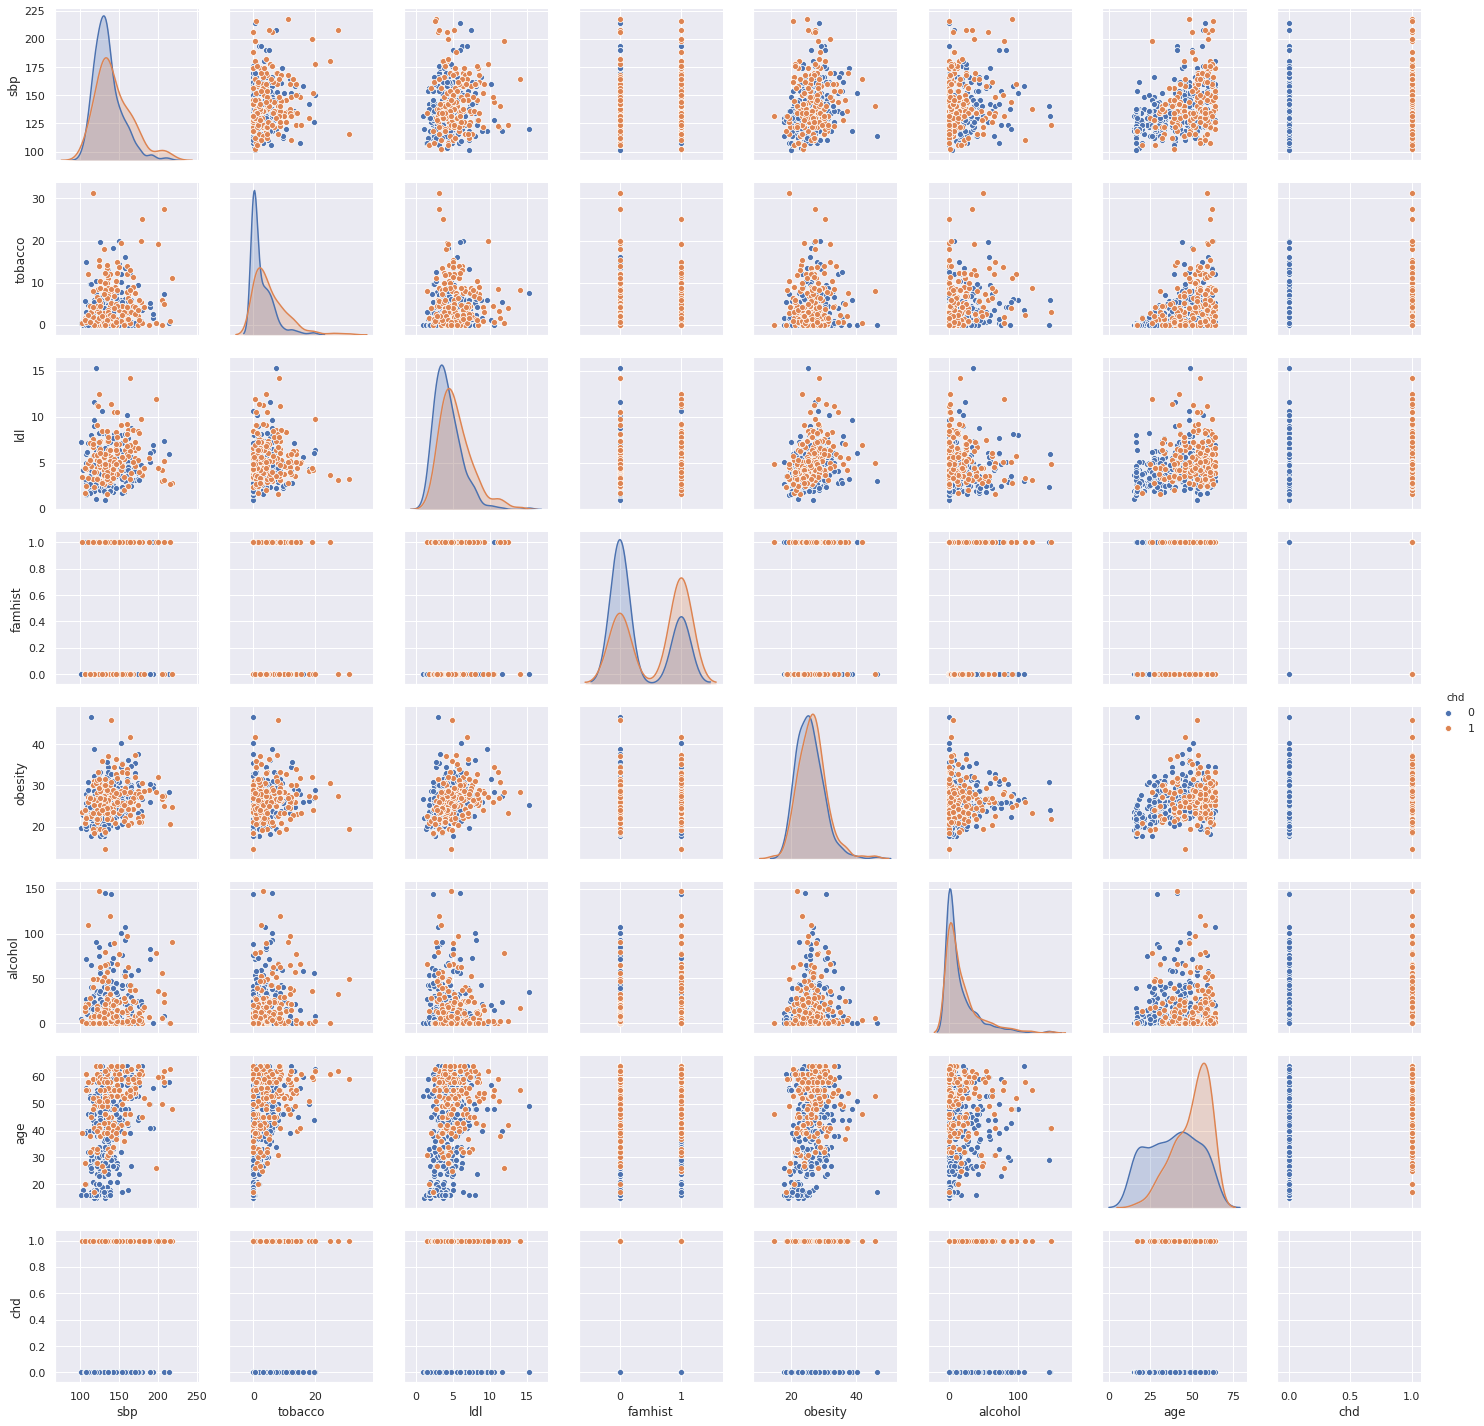

In [103]:
df4 =df3.iloc[:,[0,1,2,4,6,7,8,-1]]
sns.pairplot(df4,hue='chd',size=2.5)
np.sign(0)

In [106]:
lgs2 =Logistic()

lgs2.fit(X,(y^1),tol=0.0001)  #通用的算法是先看y=0,再看y=1，这里区分一般logistic先看y=1,所以算的和书本上不能对应？
                              #异或取反
y_predict =lgs2.predict(X)

std =np.sqrt(np.diagonal(lgs2.covs[0]))
print('beta ',lgs2.betas[:,0])
print('std ',std)
print('z scores ',(lgs2.betas[:,0]/std))
err =np.count_nonzero((y_predict^1)!=np.argmax(y,axis=1))/(1.0*X.shape[0])  #Logistic回归看来对这个问题不大行
print('train error ',err)
mask =np.ones((X.shape[1],),dtype=int)
indexs =np.array(range(X.shape[1],),dtype=int)
lgs2.analysis_of_deviance(X,(y^1),mask,num=(4))
print('after analysis of deviance ')
lgs2.fit(X[:,indexs[mask!=0]],(y^1),tol=0.0001)  #通用的算法是先看y=0,再看y=1，这里区分一般logistic先看y=1,所以算的和书本上不能对应？                              #异或取反
y_predict =lgs2.predict(X[:,indexs[mask!=0]])

std =np.sqrt(np.diagonal(lgs2.covs[0]))
print('beta ',lgs2.betas[:,0])
print('std ',std)
print('z scores ',(lgs2.betas[:,0]/std))
err =np.count_nonzero((y_predict^1)!=np.argmax(y,axis=1))/(1.0*X.shape[0])  #Logistic回归看来对这个问题不大行
print('train error ',err)

beta  [-4.12959973e+00  5.76067669e-03  7.95256307e-02  1.84779334e-01
  9.39185489e-01 -3.45434338e-02  6.06501728e-04  4.25412099e-02]
std  [0.96418718 0.00563267 0.0262153  0.05741239 0.22487371 0.02910577
 0.00445506 0.01017535]
z scores  [-4.28298551  1.0227258   3.03355762  3.21845733  4.17650191 -1.18682412
  0.13613781  4.180811  ]
train error  0.27056277056277056
mask  [1 1 1 1 1 1 1]
full_deviance  483.1740323628657
min_val  483.19253618639783
mask  [1 1 1 1 1 0 1]
mask  [1 1 1 1 1 0 1]
full_deviance  483.19253618639783
min_val  484.29674784439834
mask  [0 1 1 1 1 0 1]
mask  [0 1 1 1 1 0 1]
full_deviance  484.29674784439834
min_val  485.44386100460156
mask  [0 1 1 1 0 0 1]
after analysis of deviance 
beta  [-4.20427542  0.08070059  0.16758415  0.92411669  0.04404247]
std  [0.498348   0.02551477 0.05418979 0.22318295 0.00974321]
z scores  [-8.43642477  3.16289649  3.09254126  4.14062409  4.52032638]
train error  0.2683982683982684


In [119]:
class L1RegularizedLogistic:
    """
    K =1
    """
    def __init__(self,beta=None,p=None):
        self.beta =beta
        self.p =p
        
    
    def fit(self,X,y,lda=0.2,tol=0.0001):
        Xs =X.copy()
        ys =y.copy()
        [N,p]=Xs.shape
        Xs =np.concatenate([np.ones((N,1),dtype=float),Xs],axis=1)
        ys =np.argmax(ys,axis=1)
        beta_last =np.random.randn(p+1)
        beta_cur =np.zeros((p+1,),dtype=float)
        
        fun =lambda x :(np.exp(x))/(1+np.exp(x))
        
        time =0
        counts =0
        diff_last=999.0
        while(1):
            if(counts>100):
                break
            res =np.linalg.norm(beta_last-beta_cur)
            time =time +1
            #print('beta_last ',beta_last)
            #print('beta_cur ',beta_cur)
            if(np.linalg.norm(diff_last -res)<tol):
                counts =counts+1
            else:
                counts=0
            diff_last =res
            #print('time ',time,' diff ',res)
            if(np.linalg.norm(beta_last-beta_cur)<tol):
                break
            beta_last =beta_cur.copy()
            
            P =np.array([fun(np.dot(beta_cur,x)) for x in Xs],dtype=float)
            W =np.diag(np.multiply(P,1-P))
            
            
            alpha =lda*np.sign(beta_cur)
            alpha[0]=0.0
            
            beta_cur =beta_cur +np.linalg.inv(Xs.T.dot(W).dot(Xs)).dot(Xs.T.dot(ys[:,np.newaxis]-P[:,np.newaxis])-alpha[:,np.newaxis])[:,0]
            
        
        self.beta =beta_cur
    
    def predict(self,X):
        Xs =X.copy()
        [N,p]=X.shape
        Xs =np.concatenate([np.ones((N,1),dtype=float),Xs],axis=1)
        y_predict =np.zeros((N,),dtype=int)
        
        factor =Xs.dot(self.beta[:,np.newaxis])[:,0]
        factor =(factor>0)
        y_predict[factor]=1
        return y_predict
    
        
            
            
            
        

In [123]:
"""
lda 的增大 收敛是变得越来越慢
"""

l1lgs =L1RegularizedLogistic()
l1lgs.fit(X,(y^1),lda=30)
y_predict =l1lgs.predict(X)

err =np.count_nonzero((y_predict^1)!=np.argmax(y,axis=1))/(1.0*X.shape[0])
print('train err: ',err)


time  1  diff  3.0883457946792308
time  2  diff  2.9875583103458614
time  3  diff  1.634310547458126
time  4  diff  3.054893496880588
time  5  diff  3.5341403950714856
time  6  diff  3.753203250382544
time  7  diff  3.919076770744204
time  8  diff  4.10194076823604
time  9  diff  4.313201234485133
time  10  diff  4.616070158819367
time  11  diff  5.063166096936902
time  12  diff  6.67290051433073
time  13  diff  12.484010172963872
time  14  diff  78.6795359901424
time  15  diff  25816.58635092308
time  16  diff  nan
time  17  diff  nan
time  18  diff  nan
time  19  diff  nan
time  20  diff  nan
time  21  diff  nan
time  22  diff  nan
time  23  diff  nan
time  24  diff  nan
time  25  diff  nan
time  26  diff  nan
time  27  diff  nan


/root/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


time  28  diff  nan
time  29  diff  nan
time  30  diff  nan
time  31  diff  nan
time  32  diff  nan
time  33  diff  nan
time  34  diff  nan
time  35  diff  nan
time  36  diff  nan
time  37  diff  nan
time  38  diff  nan
time  39  diff  nan
time  40  diff  nan
time  41  diff  nan
time  42  diff  nan
time  43  diff  nan
time  44  diff  nan
time  45  diff  nan
time  46  diff  nan
time  47  diff  nan
time  48  diff  nan
time  49  diff  nan
time  50  diff  nan
time  51  diff  nan
time  52  diff  nan
time  53  diff  nan
time  54  diff  nan
time  55  diff  nan
time  56  diff  nan
time  57  diff  nan
time  58  diff  nan
time  59  diff  nan
time  60  diff  nan
time  61  diff  nan
time  62  diff  nan
time  63  diff  nan
time  64  diff  nan
time  65  diff  nan
time  66  diff  nan
time  67  diff  nan
time  68  diff  nan
time  69  diff  nan
time  70  diff  nan
time  71  diff  nan
time  72  diff  nan
time  73  diff  nan
time  74  diff  nan
time  75  diff  nan
time  76  diff  nan
time  77  diff  nan


time  425  diff  nan
time  426  diff  nan
time  427  diff  nan
time  428  diff  nan
time  429  diff  nan
time  430  diff  nan
time  431  diff  nan
time  432  diff  nan
time  433  diff  nan
time  434  diff  nan
time  435  diff  nan
time  436  diff  nan
time  437  diff  nan
time  438  diff  nan
time  439  diff  nan
time  440  diff  nan
time  441  diff  nan
time  442  diff  nan
time  443  diff  nan
time  444  diff  nan
time  445  diff  nan
time  446  diff  nan
time  447  diff  nan
time  448  diff  nan
time  449  diff  nan
time  450  diff  nan
time  451  diff  nan
time  452  diff  nan
time  453  diff  nan
time  454  diff  nan
time  455  diff  nan
time  456  diff  nan
time  457  diff  nan
time  458  diff  nan
time  459  diff  nan
time  460  diff  nan
time  461  diff  nan
time  462  diff  nan
time  463  diff  nan
time  464  diff  nan
time  465  diff  nan
time  466  diff  nan
time  467  diff  nan
time  468  diff  nan
time  469  diff  nan
time  470  diff  nan
time  471  diff  nan
time  472  di

time  822  diff  nan
time  823  diff  nan
time  824  diff  nan
time  825  diff  nan
time  826  diff  nan
time  827  diff  nan
time  828  diff  nan
time  829  diff  nan
time  830  diff  nan
time  831  diff  nan
time  832  diff  nan
time  833  diff  nan
time  834  diff  nan
time  835  diff  nan
time  836  diff  nan
time  837  diff  nan
time  838  diff  nan
time  839  diff  nan
time  840  diff  nan
time  841  diff  nan
time  842  diff  nan
time  843  diff  nan
time  844  diff  nan
time  845  diff  nan
time  846  diff  nan
time  847  diff  nan
time  848  diff  nan
time  849  diff  nan
time  850  diff  nan
time  851  diff  nan
time  852  diff  nan
time  853  diff  nan
time  854  diff  nan
time  855  diff  nan
time  856  diff  nan
time  857  diff  nan
time  858  diff  nan
time  859  diff  nan
time  860  diff  nan
time  861  diff  nan
time  862  diff  nan
time  863  diff  nan
time  864  diff  nan
time  865  diff  nan
time  866  diff  nan
time  867  diff  nan
time  868  diff  nan
time  869  di

time  1203  diff  nan
time  1204  diff  nan
time  1205  diff  nan
time  1206  diff  nan
time  1207  diff  nan
time  1208  diff  nan
time  1209  diff  nan
time  1210  diff  nan
time  1211  diff  nan
time  1212  diff  nan
time  1213  diff  nan
time  1214  diff  nan
time  1215  diff  nan
time  1216  diff  nan
time  1217  diff  nan
time  1218  diff  nan
time  1219  diff  nan
time  1220  diff  nan
time  1221  diff  nan
time  1222  diff  nan
time  1223  diff  nan
time  1224  diff  nan
time  1225  diff  nan
time  1226  diff  nan
time  1227  diff  nan
time  1228  diff  nan
time  1229  diff  nan
time  1230  diff  nan
time  1231  diff  nan
time  1232  diff  nan
time  1233  diff  nan
time  1234  diff  nan
time  1235  diff  nan
time  1236  diff  nan
time  1237  diff  nan
time  1238  diff  nan
time  1239  diff  nan
time  1240  diff  nan
time  1241  diff  nan
time  1242  diff  nan
time  1243  diff  nan
time  1244  diff  nan
time  1245  diff  nan
time  1246  diff  nan
time  1247  diff  nan
time  1248

KeyboardInterrupt: 

In [ ]:
lda =np.linspace(0,1000,10000)
labels =['sbp','tobacco','ldl','famhist','obesity','alcohol','age']
lines =['-g','-b','-r','-y','-c','-m','--g','-w']

In [69]:
tt =np.array([[0,1],[1,0],[1,1],[0,0]],dtype=int)

In [70]:
print(tt)

[[0 1]
 [1 0]
 [1 1]
 [0 0]]


In [73]:
tt^1

array([[1, 0],
       [0, 1],
       [0, 0],
       [1, 1]])